# Problem Statement : Analyse if there is any  effect  of drug and on the body of an individual

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv('Effect of drug on pain.csv')

In [138]:
df.head()

,Age,Group,Indication,Duration,Pulse pre procedure,Pulse post procedure,Sys BP pre procedure,Sys BP Post procedure,Performed by,Pain Score,Add analgesia
0,55,A,1,2.0,68.0,67,145,140,RESIDENT,0,No
1,38,A,1,6.0,72.0,70,139,140,RESIDENT,3,No
2,80,A,1,10.0,66.0,65,128,130,RESIDENT,2,No
3,27,A,3,4.0,82.0,80,140,138,RESIDENT,4,No
4,35,A,3,6.0,72.0,70,135,138,RESIDENT,4,No


In [139]:
df.isnull().sum()

Age                      0
Group                    0
Indication               0
Duration                 0
Pulse pre procedure      8
Pulse post procedure     0
Sys BP pre procedure     0
Sys BP Post procedure    0
Performed by             0
Pain Score               0
Add analgesia            0
dtype: int64

In [140]:
df.isna().sum()

Age                      0
Group                    0
Indication               0
Duration                 0
Pulse pre procedure      8
Pulse post procedure     0
Sys BP pre procedure     0
Sys BP Post procedure    0
Performed by             0
Pain Score               0
Add analgesia            0
dtype: int64

In [115]:
df.describe()

,Age,Indication,Duration,Pulse pre procedure,Pulse post procedure,Sys BP pre procedure,Sys BP Post procedure,Pain Score
count,60.000000,60.000000,60.000000,52.000000,60.000000,60.000000,60.000000,60.000000
mean,46.750000,2.533333,5.511667,73.057692,74.316667,125.966667,126.000000,3.633333
std,16.117813,0.675646,2.136137,7.341564,6.510726,10.872086,10.003389,1.437591
min,18.000000,1.000000,2.000000,61.000000,64.000000,110.000000,110.000000,0.000000
25%,32.750000,2.000000,4.000000,68.000000,69.000000,117.000000,119.000000,3.000000
50%,49.000000,3.000000,5.150000,71.000000,75.000000,121.500000,120.000000,4.000000
75%,59.000000,3.000000,7.000000,79.000000,80.000000,138.000000,135.000000,4.000000
max,80.000000,3.000000,10.000000,88.000000,90.000000,145.000000,148.000000,7.000000


In [116]:
df.shape

(60, 11)

In [117]:
df.shape[0]

60

In [141]:
missing_pulse_pre=[]
for i in range(df.shape[0]):
    if pd.isnull(df['Pulse pre procedure'].iloc[i]):
        missing_pulse_pre.append(i)

In [142]:
missing_pulse_pre

[6, 13, 18, 19, 28, 29, 43, 59]

In [143]:
for x in missing_pulse_pre:
    print(df.iloc[x-1:x+1])  

   Age Group  Indication  Duration  Pulse pre procedure  Pulse post procedure  \
5   44     A           3       7.0                 77.0                    76   
6   50     A           3       2.5                  NaN                    70   

   Sys BP pre procedure  Sys BP Post procedure Performed by  Pain Score  \
5                   116                    120     RESIDENT           2   
6                   118                    120     RESIDENT           4   

  Add analgesia  
5            No  
6            No  
    Age Group  Indication  Duration  Pulse pre procedure  \
12   78     A           3       4.2                 68.0   
13   69     A           3       7.0                  NaN   

    Pulse post procedure  Sys BP pre procedure  Sys BP Post procedure  \
12                    68                   130                    135   
13                    70                   119                    120   

   Performed by  Pain Score Add analgesia  
12     RESIDENT           3    

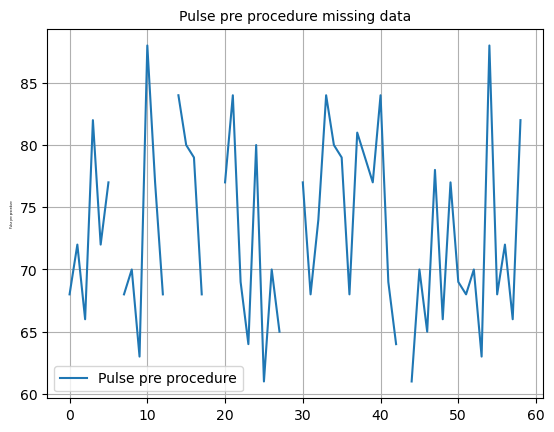

In [144]:
df.plot(y='Pulse pre procedure', use_index=True) #uses index values in x axis
plt.title("Pulse pre procedure missing data",fontsize=10)
plt.ylabel("Pulse pre procedure",fontsize=2)
#plt.xticks(rotation=90)
#plt.legend(loc=4)
plt.grid()

In [122]:
df['Pulse pre_cleaned_linear']=df['Pulse pre procedure'].fillna(method='ffill')

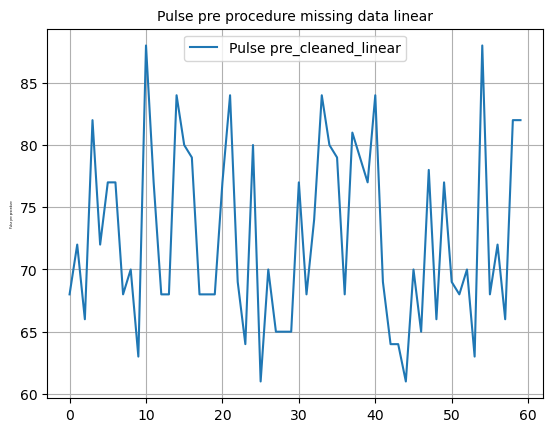

In [123]:
df.plot(y='Pulse pre_cleaned_linear', use_index=True)
plt.title("Pulse pre procedure missing data linear",fontsize=10)
plt.ylabel("Pulse pre procedure",fontsize=2)
#plt.xticks(rotation=90)
#plt.legend(loc=4)
plt.grid()

In [145]:
df['Pulse pre_cleaned_poly']=df['Pulse pre procedure'].interpolate(method='polynomial', order=2) 
# if order is kept 1 ,then it will again act like linear interpolation only

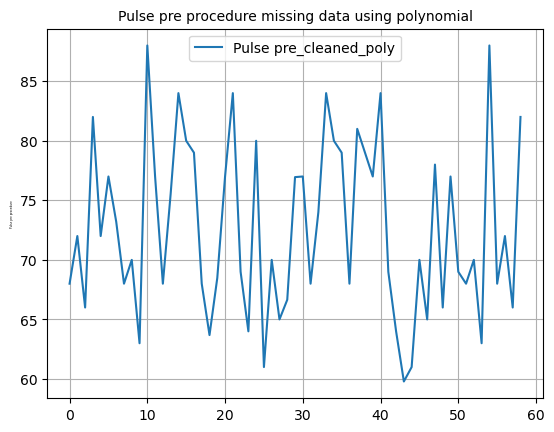

In [146]:
df.plot(y='Pulse pre_cleaned_poly', use_index=True)
plt.title("Pulse pre procedure missing data using polynomial",fontsize=10)
plt.ylabel("Pulse pre procedure",fontsize=2)
#plt.xticks(rotation=90)
#plt.legend(loc=4)
plt.grid()

In [126]:
df['Pulse pre_cleaned_spline']=df['Pulse pre procedure'].interpolate(method='spline', order=2) 

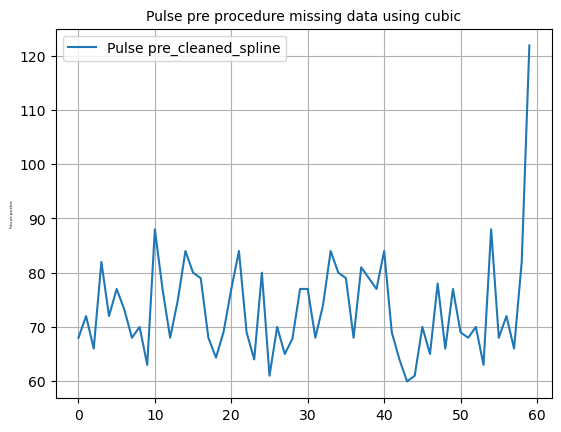

In [127]:
df.plot(y='Pulse pre_cleaned_spline', use_index=True)
plt.title("Pulse pre procedure missing data using cubic",fontsize=10)
plt.ylabel("Pulse pre procedure",fontsize=2)
#plt.xticks(rotation=90)
#plt.legend(loc=4)
plt.grid()

In [149]:
df['Pulse pre_cleaned_poly'].isna().sum()

1

In [151]:
df['Pulse pre_cleaned_poly']=df['Pulse pre_cleaned_poly'].fillna(method='ffill')

In [153]:
df['Pulse pre_cleaned_poly'].skew()

0.25108412700232374